# Indian Traffic Sign Detection Using InceptionV3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout, GlobalAveragePooling2D
from tensorflow.keras import optimizers, losses
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing import image

In [3]:
# Importing InceptionV3 Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [4]:
data_dir = "F:\\04- PYTHON PROJECTS\\03- Artificial Intelligence\\CNN Projects\\Indian Traffic Sign Prediction\\traffic_sign_classification_dataset\\train"

## Loading Images For Training & Testing

In [5]:
datagenerator = {
    "train" : ImageDataGenerator(horizontal_flip=True,
                                 vertical_flip=True,
                                 rescale=1./255,
                                 validation_split=0.1,
                                 shear_range=0.1,
                                 zoom_range=0.1,
                                 rotation_range=30,
                                 width_shift_range=0.1,
                                 height_shift_range=0.1,
                                 ).flow_from_directory(directory=data_dir,
                                                       target_size=(300,300),
                                                       subset='training'
                                                      ) ,
    "valid" : ImageDataGenerator(rescale=1/255,
                                 validation_split=0.1).flow_from_directory(directory=data_dir,
                                                                           target_size=(300,300),
                                                                           subset='validation')
    
    
}

Found 4031 images belonging to 85 classes.
Found 407 images belonging to 85 classes.


## Initialize InceptionV3 Pretrained Model

In [6]:
load_weights = "F:\\04- PYTHON PROJECTS\\03- Artificial Intelligence\\CNN Projects\\Indian Traffic Sign Prediction\\inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"

In [7]:
# Initializing InceptionV3
base_model = InceptionV3(include_top=False,
                         weights=load_weights,
                         input_shape=(300,300,3))

base_model.trainable = False

## Adding Custom Layer

In [8]:
# Adding some more layers at the end of the Model as per our requirement
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(rate=0.15),
    Dense(units=1024, activation='relu'),
    
    # Final Output Layer
    Dense(units=85, activation='softmax') # 85 units as ww have 85 classes
])

In [9]:
# Using "adam" optimizer
optimizer = optimizers.Adam(learning_rate=0.0001)

# Compiling the model
model.compile(optimizer=optimizer,
              loss = "categorical_crossentropy",
              metrics=['accuracy'])

In [10]:
# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dense_1 (Dense)             (None, 85)                87125     
                                                                 
Total params: 23,988,085
Trainable params: 2,185,301
Non-trainable params: 21,802,784
____________________________________

In [11]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


## Model Building

In [12]:
batch_size = 32
epochs = 10

# Separating Training and Testing Data
train_generator = datagenerator["train"]
valid_generator = datagenerator["valid"]

In [13]:
# Calculating variables for the model
steps_per_epoch = train_generator.n // batch_size
validation_steps = valid_generator.n // batch_size

print("Steps_per_epochs:", steps_per_epoch)
print("Validation_steps:", validation_steps)

Steps_per_epochs: 125
Validation_steps: 12


## Model Training


In [14]:
# File Path to store the trained models
filepath = "./model_{epoch:02d}-{val_accuracy:.2f}.h5"

# Using the ModelCheckpoint function to train and store all the best models
checkpoint1 = ModelCheckpoint(filepath, 
                              monitor='val_accuracy',
                              verbose=1, save_best_only=True,
                              mode='max')

callbacks_list = [checkpoint1]

In [15]:
# Training the model
history = model.fit(train_generator,
                    epochs=epochs,
                    steps_per_epoch=steps_per_epoch,
                    callbacks=callbacks_list,
                    validation_data=valid_generator,
                    validation_steps=validation_steps)

Epoch 1/10
125/125 [==============================] - ETA: 0s - loss: 3.2398 - accuracy: 0.2441
Epoch 1: val_accuracy improved from -inf to 0.28646, saving model to .\model_01-0.29.h5
125/125 [==============================] - 698s 5s/step - loss: 3.2398 - accuracy: 0.2441 - val_loss: 2.9617 - val_accuracy: 0.2865
Epoch 2/10
125/125 [==============================] - ETA: 0s - loss: 2.2595 - accuracy: 0.4181
Epoch 2: val_accuracy improved from 0.28646 to 0.30729, saving model to .\model_02-0.31.h5
125/125 [==============================] - 673s 5s/step - loss: 2.2595 - accuracy: 0.4181 - val_loss: 2.5519 - val_accuracy: 0.3073
Epoch 3/10
125/125 [==============================] - ETA: 0s - loss: 1.8333 - accuracy: 0.5159
Epoch 3: val_accuracy improved from 0.30729 to 0.40885, saving model to .\model_03-0.41.h5
125/125 [==============================] - 671s 5s/step - loss: 1.8333 - accuracy: 0.5159 - val_loss: 2.3138 - val_accuracy: 0.4089
Epoch 4/10
125/125 [==========================

## Model Evaluation

In [1]:
# Accuracy
training_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Loss
training_loss = history.history['loss']
val_loss = history.history['val_loss']

NameError: name 'history' is not defined

In [ ]:
# Accuracy
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(training_acc, label="Training Accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.ylabel("Accuracy")
plt.ylim([min(plt.ylim()), 1])
plt.title("Training v/s Validation Accuracy")

# Loss
plt.subplot(2, 1, 2)
plt.plot(training_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

In [20]:
test_loss, test_acc = model.evaluate(valid_generator)

13/13 [==============================] - 46s 3s/step - loss: 1.7661 - accuracy: 0.5086


In [21]:
print('test accuracy : ', test_acc)

test accuracy :  0.5085995197296143


In [2]:
from tensorflow.keras.models import load_model

In [3]:
# Importing the model with best VALIDATION ACCURACY
load_best_model = load_model("model_08-0.51.h5")

In [24]:
# Function to load and predict label for image
def predict(image_path):
    
    # Import image form the path with size of (300,300)
    img = image.load_img(path=image_path,
                         target_size=(300,300))
    
    # Convert Image to a numpy array
    img = image.img_to_array(img, dtype=np.uint8)
    
    # Scaling the Image Array values between 0 and 1
    img = np.array(img)/255.0
    
    # plotting the loaded image
    plt.title("Loaded Image")
    plt.axis("off")
    plt.imshow(img.squeeze())
    plt.show()
    
    # Prediction for teh new image by the loaded model
    p = load_best_model.predict((img[np.newaxis, ...]))
    
    # Label array
    labels = {0: 'ALL_MOTOR_VEHICLE_PROHIBITED', 1: 'AXLE_LOAD_LIMIT', 2: 'BARRIER_AHEAD', 3: 'BULLOCK_AND_HANDCART_PROHIBITED', 4: 'Dragonfly', 5: 'CATTLE',
              6: 'COMPULSARY_AHEAD', 7: 'COMPULSARY_AHEAD_OR_TURN_LEFT', 8: 'COMPULSARY_AHEAD_OR_TURN_RIGHT', 9: 'COMPULSARY_CYCLE_TRACK',10: 'COMPULSARY_KEEP_RIGHT',11: 'COMPULSARY_KEEP_RIGHT',12: 'COMPULSARY_MINIMUM_SPEED',13: 'COMPULSARY_SOUND_HORN',14: 'COMPULSARY_TURN_LEFT',
             15: 'COMPULSARY_TURN_LEFT_AHEAD',16: 'COMPULSARY_TURN_RIGHT',17: 'COMPULSARY_TURN_RIGHT_AHEAD',18: 'CROSS_ROAD',19: 'CYCLE_CROSSING',20: 'CYCLE_PROHIBITED',21: 'DANGEROUS_DIP',
             22: 'DIRECTION',23: 'FALLING_ROCKS',24: 'FERRY',25: 'GAP_IN_MEDIAN',26: 'GIVE_WAY',27: 'GUARDED_LEVEL_CROSSING',28: 'HANDCART_PROHIBITED',
             29: 'HEIGHT_LIMIT',30: 'HORN_PROHIBITED',31: 'HUMP_OR_ROUGH_ROAD',32: 'LEFT_HAIR_PIN_BEND',33: 'LEFT_HAND_CURVE',34: 'LEFT_REVERSE_BEND',35: 'LEFT_TURN_PROHIBITED',
             36: 'LENGTH_LIMIT',37: 'LOAD_LIMIT',38: 'LOOSE_GRAVEL',39: 'MEN_AT_WORK',40: 'NARROW_BRIDGE',41: 'NARROW_ROAD_AHEAD',42: 'NO_ENTRY',
             43: 'NO_PARKING',44: 'NO_STOPPING_OR_STANDING',45: 'OVERTAKING_PROHIBITED',46: 'PASS_EITHER_SIDE',47: 'PEDESTRIAN_CROSSING',48: 'PEDESTRIAN_PROHIBITED',49: 'PRIORITY_FOR_ONCOMING_VEHICLES',
             50: 'QUAY_SIDE_OR_RIVER_BANK',51: 'RESTRICTION_ENDS',52: 'RIGHT_HAIR_PIN_BEND',53: 'RIGHT_HAND_CURVE',54: 'RIGHT_REVERSE_BEND',55: 'RIGHT_TURN_PROHIBITED',56: 'ROAD_WIDENS_AHEAD',
             57: 'ROUNDABOUT',58: 'SCHOOL_AHEAD',59: 'SIDE_ROAD_LEFT',60: 'SIDE_ROAD_RIGHT',61: 'SLIPPERY_ROAD',62: 'SPEED_LIMIT_15',63: 'SPEED_LIMIT_20',
             64: 'SPEED_LIMIT_30',65: 'SPEED_LIMIT_40',66: 'SPEED_LIMIT_5',67: 'SPEED_LIMIT_50',68: 'SPEED_LIMIT_60',69: 'SPEED_LIMIT_70',70: 'SPEED_LIMIT_80',
             71: 'STAGGERED_INTERSECTION',72: 'STEEP_ASCENT',73: 'STEEP_DESCENT',74: 'STOP',75: 'STRAIGHT_PROHIBITED',76: 'TONGA_PROHIBITED',77: 'TRAFFIC_SIGNAL',
             78: 'TRUCK_PROHIBITED',79: 'TURN_RIGHT',80: 'T_INTERSECTION',81: 'UNGUARDED_LEVEL_CROSSING',82: 'U_TURN_PROHIBITED',83: 'WIDTH_LIMIT',84: 'Y_INTERSECTION',}
    
    print("\n\nMaximum Probability: ", np.max(p[0], axis=-1))
    
    predicted_class = labels[np.argmax(p[0], axis=-1)]
    print("Classified:", predicted_class, "\n\n")
    
    classes = []
    prob = []
    
    print("\n-------------------Individual Probability--------------------------------\n")
    
    for i,j in enumerate (p[0],0):
        print(labels[i].upper(),':',round(j*100,2),'%')
        classes.append(labels[i])
        prob.append(round(j*100,2))
        
    def plot_bar_x():
        # this is for plotting purpose
        index = np.arange(len(classes))
        plt.bar(index, prob)
        plt.xlabel('Labels', fontsize=8)
        plt.ylabel('Probability', fontsize=8)
        plt.xticks(index, classes, fontsize=8, rotation=20)
        plt.title('Probability for loaded image')
        plt.show()
    plot_bar_x()

## Model Testing With Graphs

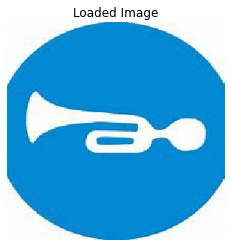

1/1 [==============================] - 5s 5s/step


Maximum Probability:  0.59563094
Classified: COMPULSARY_SOUND_HORN 



-------------------Individual Probability--------------------------------

ALL_MOTOR_VEHICLE_PROHIBITED : 0.22 %
AXLE_LOAD_LIMIT : 0.03 %
BARRIER_AHEAD : 0.01 %
BULLOCK_AND_HANDCART_PROHIBITED : 0.01 %
DRAGONFLY : 0.02 %
CATTLE : 0.01 %
COMPULSARY_AHEAD : 0.02 %
COMPULSARY_AHEAD_OR_TURN_LEFT : 0.25 %
COMPULSARY_AHEAD_OR_TURN_RIGHT : 0.58 %
COMPULSARY_CYCLE_TRACK : 4.7 %
COMPULSARY_KEEP_RIGHT : 5.33 %
COMPULSARY_KEEP_RIGHT : 1.24 %
COMPULSARY_MINIMUM_SPEED : 5.42 %
COMPULSARY_SOUND_HORN : 59.56 %
COMPULSARY_TURN_LEFT : 7.32 %
COMPULSARY_TURN_LEFT_AHEAD : 5.02 %
COMPULSARY_TURN_RIGHT : 0.09 %
COMPULSARY_TURN_RIGHT_AHEAD : 5.54 %
CROSS_ROAD : 0.01 %
CYCLE_CROSSING : 0.01 %
CYCLE_PROHIBITED : 0.07 %
DANGEROUS_DIP : 0.03 %
DIRECTION : 0.01 %
FALLING_ROCKS : 0.01 %
FERRY : 0.01 %
GAP_IN_MEDIAN : 0.0 %
GIVE_WAY : 0.0 %
GUARDED_LEVEL_CROSSING : 0.01 %
HANDCART_PROHIBITED :

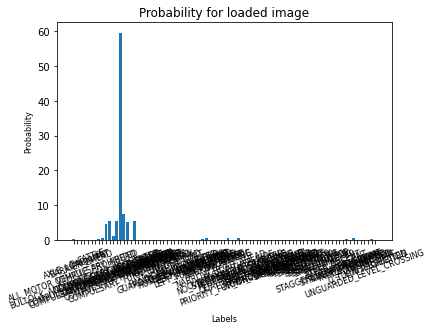

In [25]:
predict("F:\\04- PYTHON PROJECTS\\03- Artificial Intelligence\\CNN Projects\\Indian Traffic Sign Prediction\\traffic_sign_classification_dataset\\test\\COMPULSARY_SOUND_HORN\\13000.jpg")

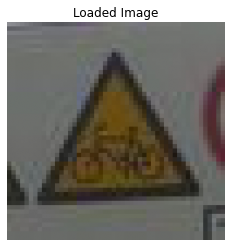

1/1 [==============================] - 0s 204ms/step


Maximum Probability:  0.6201344
Classified: CYCLE_CROSSING 



-------------------Individual Probability--------------------------------

ALL_MOTOR_VEHICLE_PROHIBITED : 0.15 %
AXLE_LOAD_LIMIT : 0.0 %
BARRIER_AHEAD : 0.01 %
BULLOCK_AND_HANDCART_PROHIBITED : 0.0 %
DRAGONFLY : 0.03 %
CATTLE : 0.03 %
COMPULSARY_AHEAD : 0.66 %
COMPULSARY_AHEAD_OR_TURN_LEFT : 0.01 %
COMPULSARY_AHEAD_OR_TURN_RIGHT : 0.02 %
COMPULSARY_CYCLE_TRACK : 0.03 %
COMPULSARY_KEEP_RIGHT : 0.18 %
COMPULSARY_KEEP_RIGHT : 0.29 %
COMPULSARY_MINIMUM_SPEED : 0.0 %
COMPULSARY_SOUND_HORN : 0.05 %
COMPULSARY_TURN_LEFT : 0.05 %
COMPULSARY_TURN_LEFT_AHEAD : 0.04 %
COMPULSARY_TURN_RIGHT : 0.01 %
COMPULSARY_TURN_RIGHT_AHEAD : 0.03 %
CROSS_ROAD : 0.0 %
CYCLE_CROSSING : 62.01 %
CYCLE_PROHIBITED : 0.1 %
DANGEROUS_DIP : 0.07 %
DIRECTION : 0.62 %
FALLING_ROCKS : 0.04 %
FERRY : 0.04 %
GAP_IN_MEDIAN : 0.06 %
GIVE_WAY : 0.53 %
GUARDED_LEVEL_CROSSING : 0.11 %
HANDCART_PROHIBITED : 0.05 %

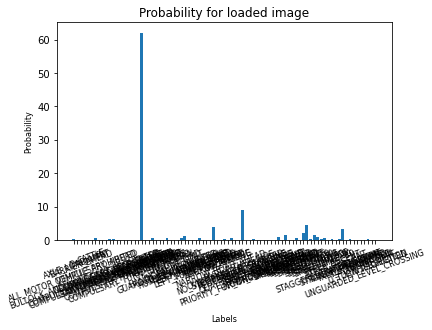

In [26]:
predict("F:\\04- PYTHON PROJECTS\\03- Artificial Intelligence\\CNN Projects\\Indian Traffic Sign Prediction\\traffic_sign_classification_dataset\\test\\CYCLE_CROSSING\\19001.jpg")

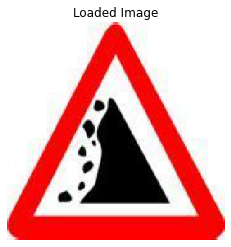

1/1 [==============================] - 0s 235ms/step


Maximum Probability:  0.25442684
Classified: FALLING_ROCKS 



-------------------Individual Probability--------------------------------

ALL_MOTOR_VEHICLE_PROHIBITED : 0.13 %
AXLE_LOAD_LIMIT : 0.02 %
BARRIER_AHEAD : 0.49 %
BULLOCK_AND_HANDCART_PROHIBITED : 0.05 %
DRAGONFLY : 0.17 %
CATTLE : 2.06 %
COMPULSARY_AHEAD : 0.07 %
COMPULSARY_AHEAD_OR_TURN_LEFT : 0.13 %
COMPULSARY_AHEAD_OR_TURN_RIGHT : 0.09 %
COMPULSARY_CYCLE_TRACK : 0.2 %
COMPULSARY_KEEP_RIGHT : 0.48 %
COMPULSARY_KEEP_RIGHT : 0.08 %
COMPULSARY_MINIMUM_SPEED : 0.0 %
COMPULSARY_SOUND_HORN : 0.01 %
COMPULSARY_TURN_LEFT : 0.08 %
COMPULSARY_TURN_LEFT_AHEAD : 0.08 %
COMPULSARY_TURN_RIGHT : 0.06 %
COMPULSARY_TURN_RIGHT_AHEAD : 0.07 %
CROSS_ROAD : 0.63 %
CYCLE_CROSSING : 2.1 %
CYCLE_PROHIBITED : 0.06 %
DANGEROUS_DIP : 1.14 %
DIRECTION : 0.07 %
FALLING_ROCKS : 25.44 %
FERRY : 0.27 %
GAP_IN_MEDIAN : 0.15 %
GIVE_WAY : 0.23 %
GUARDED_LEVEL_CROSSING : 2.66 %
HANDCART_PROHIBITED : 0.05

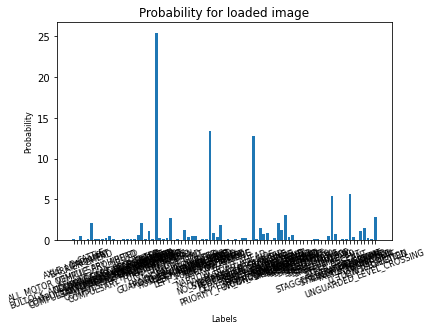

In [28]:
predict("F:\\04- PYTHON PROJECTS\\03- Artificial Intelligence\\CNN Projects\\Indian Traffic Sign Prediction\\traffic_sign_classification_dataset\\test\\FALLING_ROCKS\\23012.jpg")

#### CONCLUSION :
The Dataset needs more training datapoints, considering the number of classes i.e 85, there isn't enough of training data per class to provide robust predictions.